# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

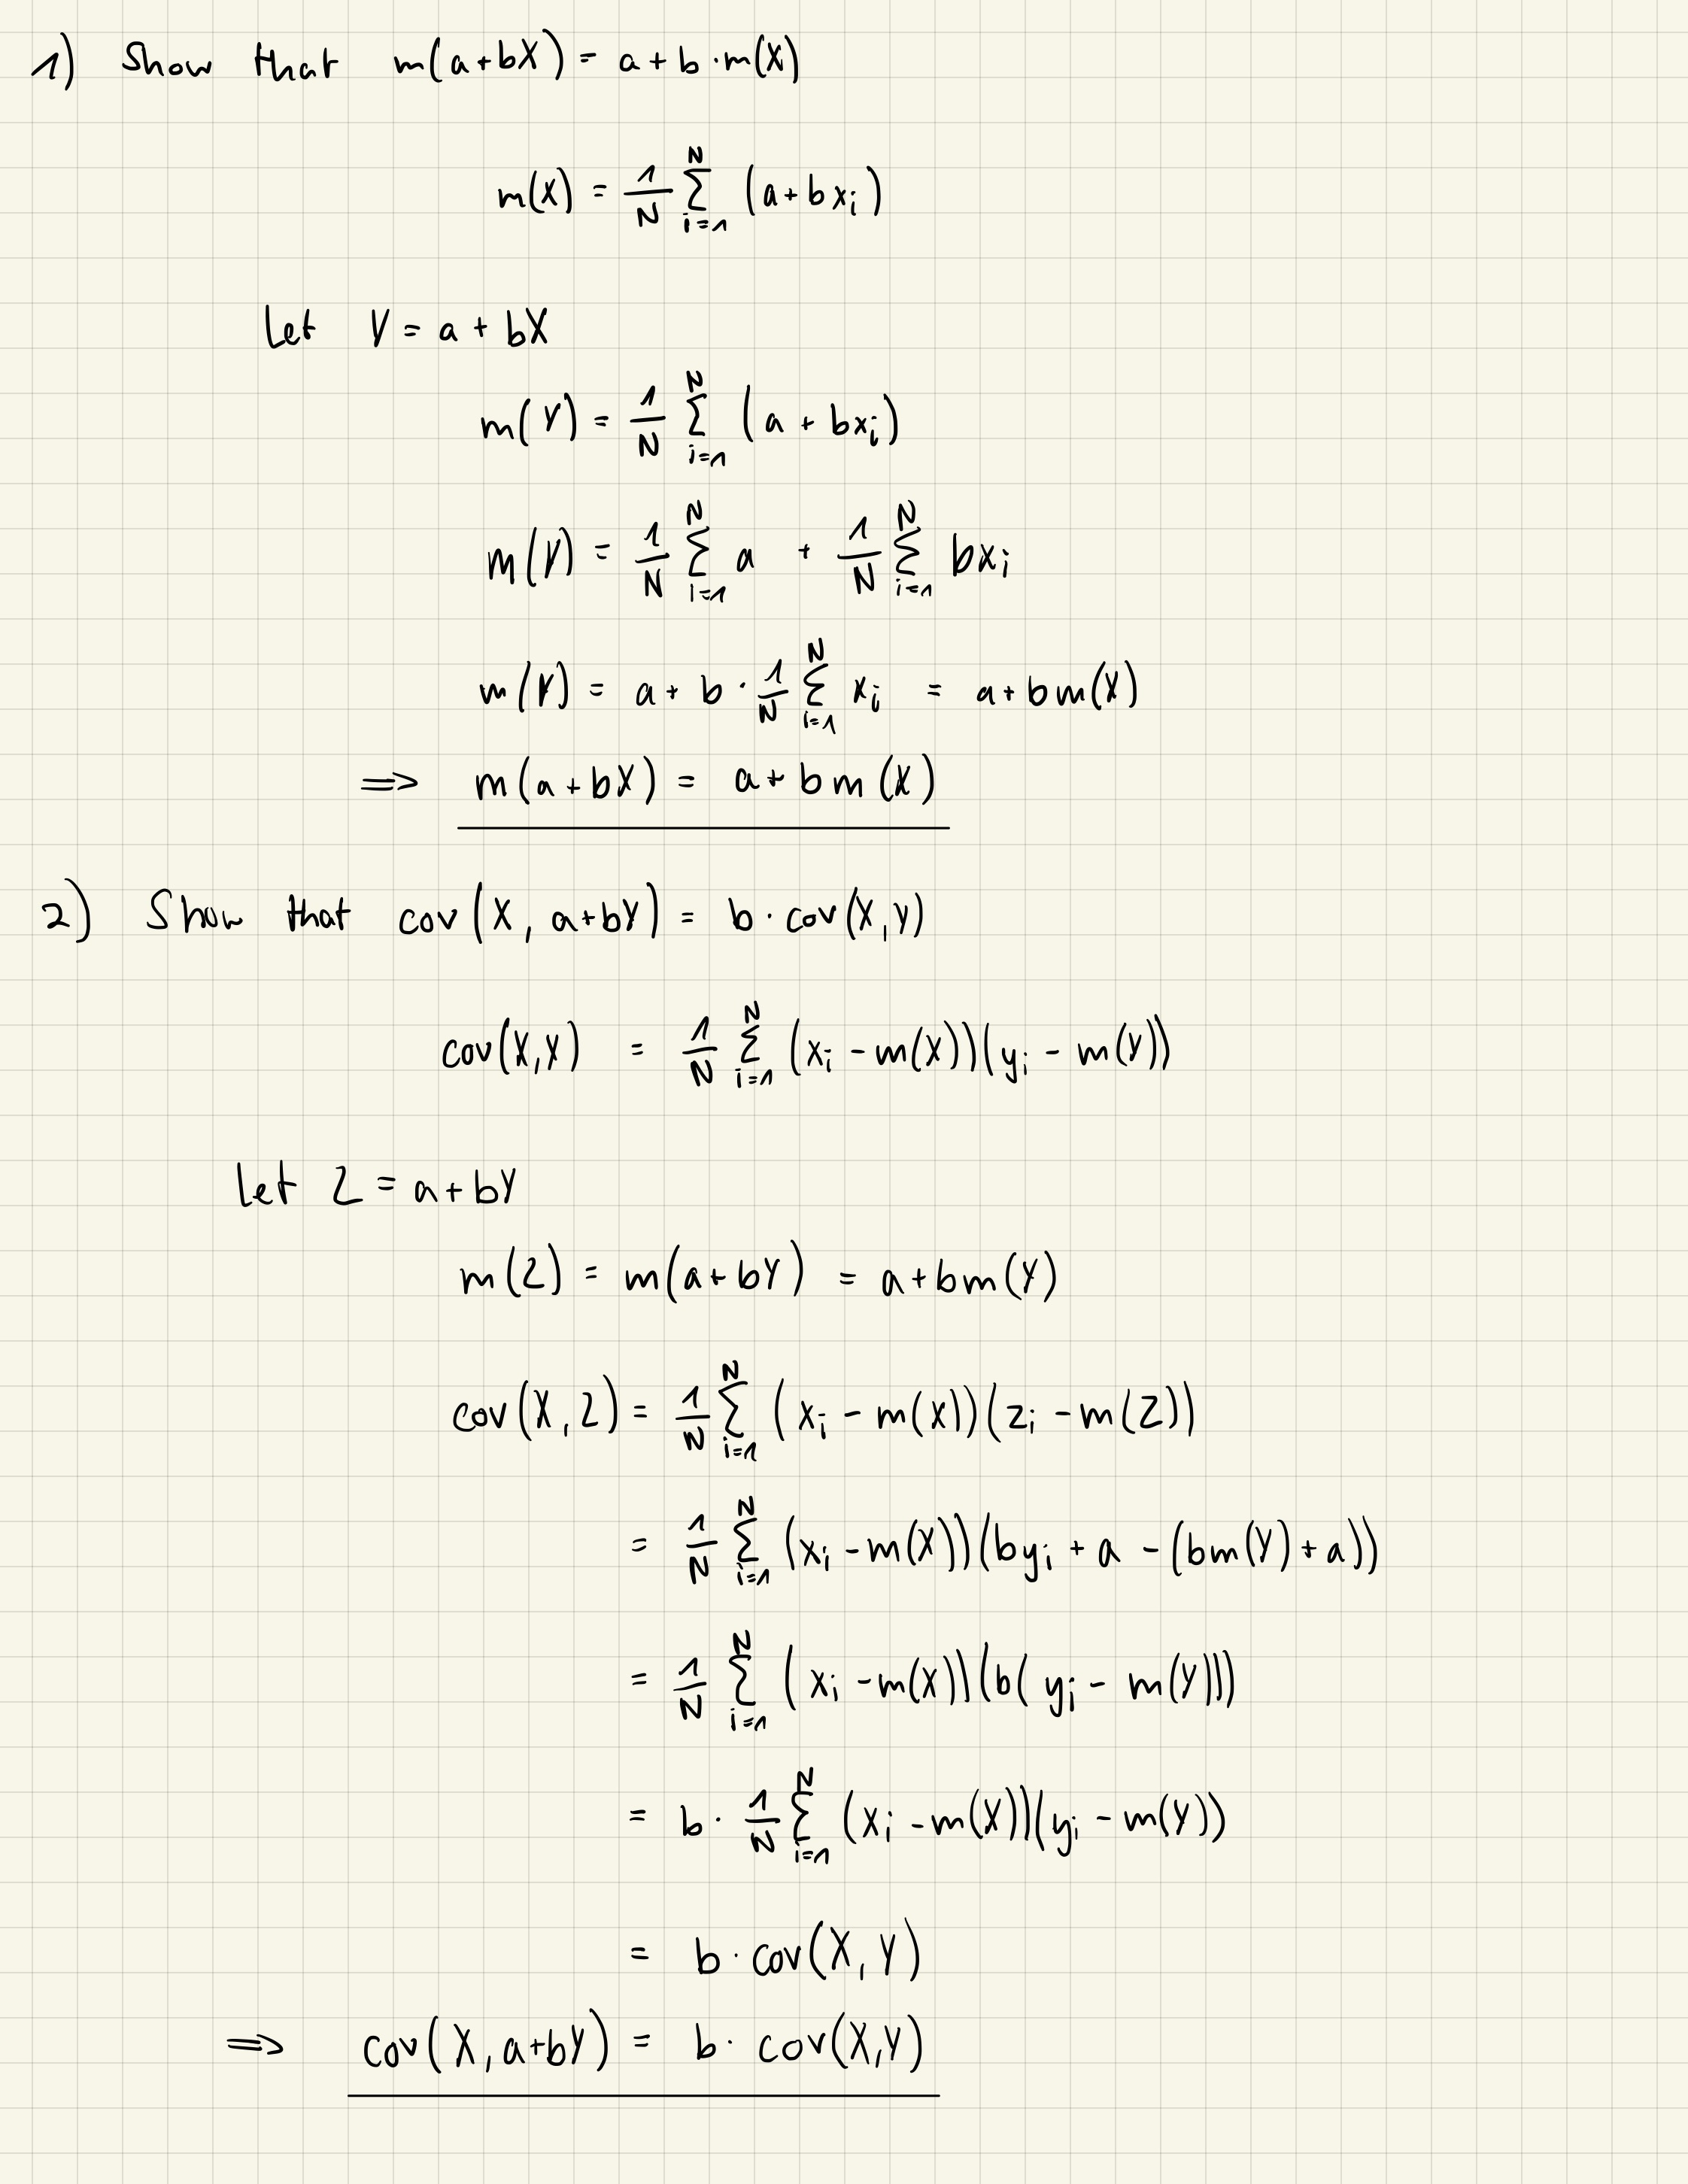

In [5]:
from PIL import Image
im = Image.open('/content/sample_data/Unbenanntes Notizbuch-1.jpg')
im.show()
display(im)

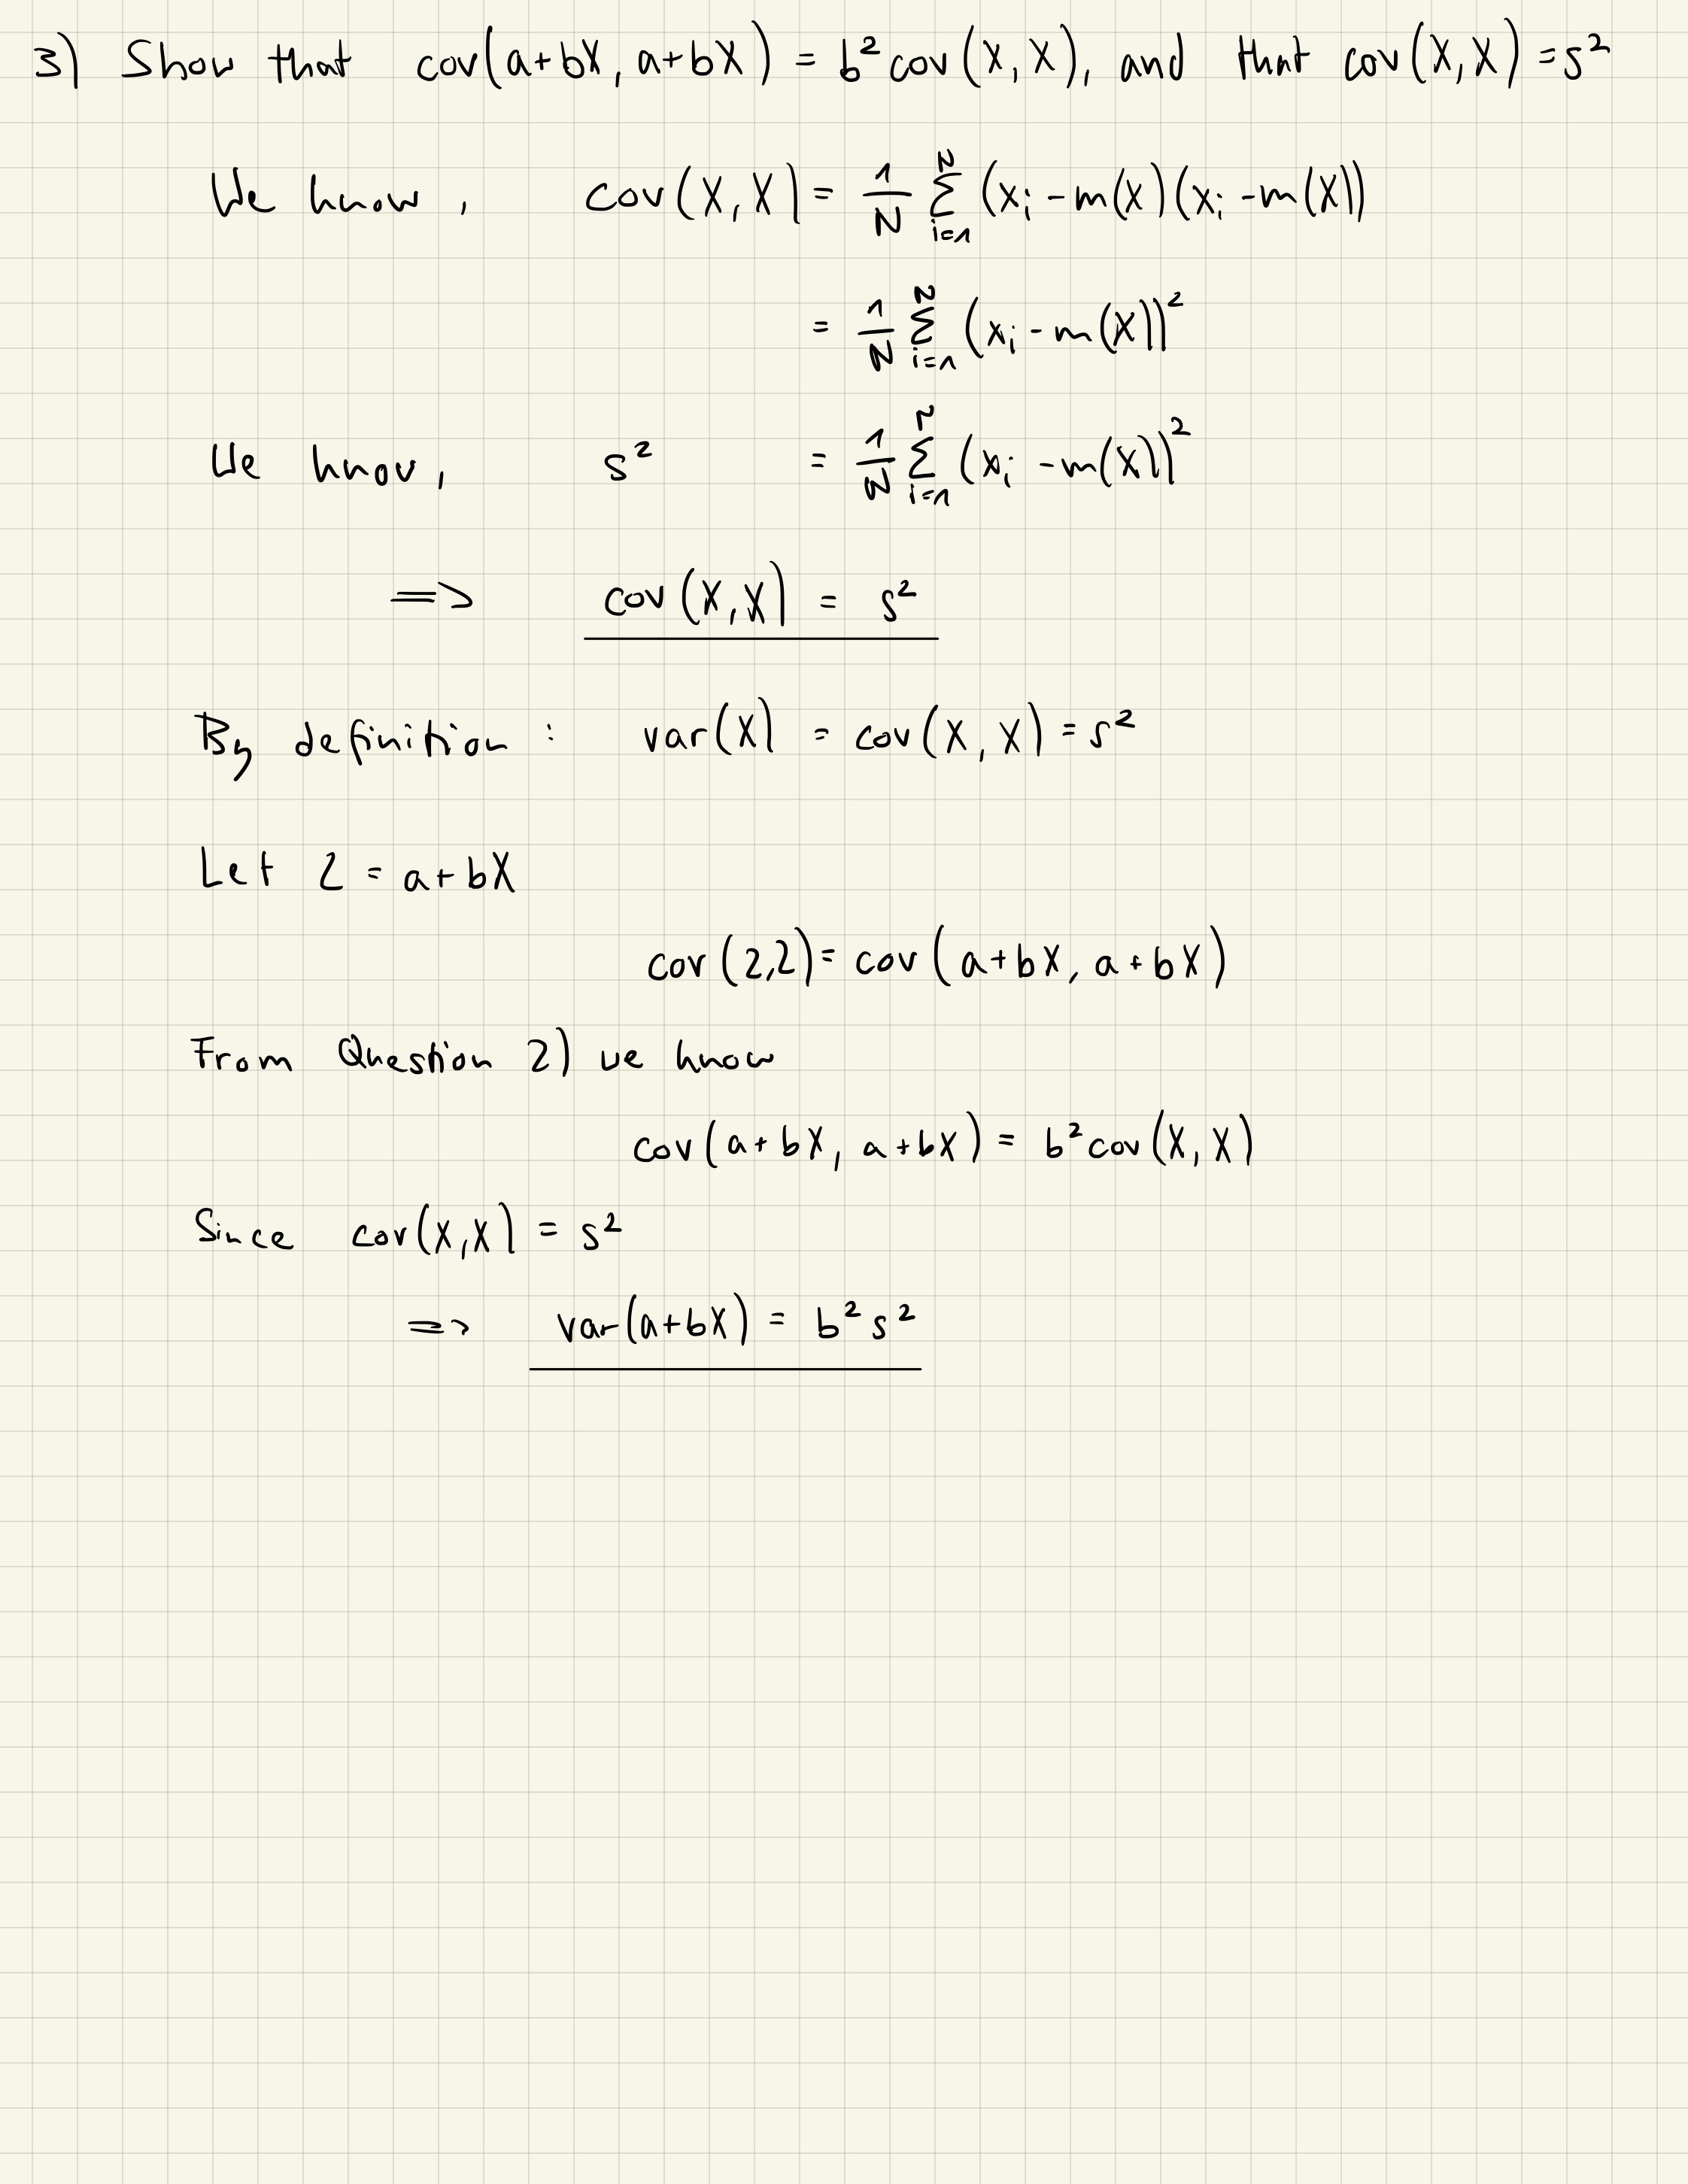

In [4]:
from PIL import Image
im1 = Image.open('/content/sample_data/Unbenanntes Notizbuch-2.jpg')
im1.show()
display(im1)

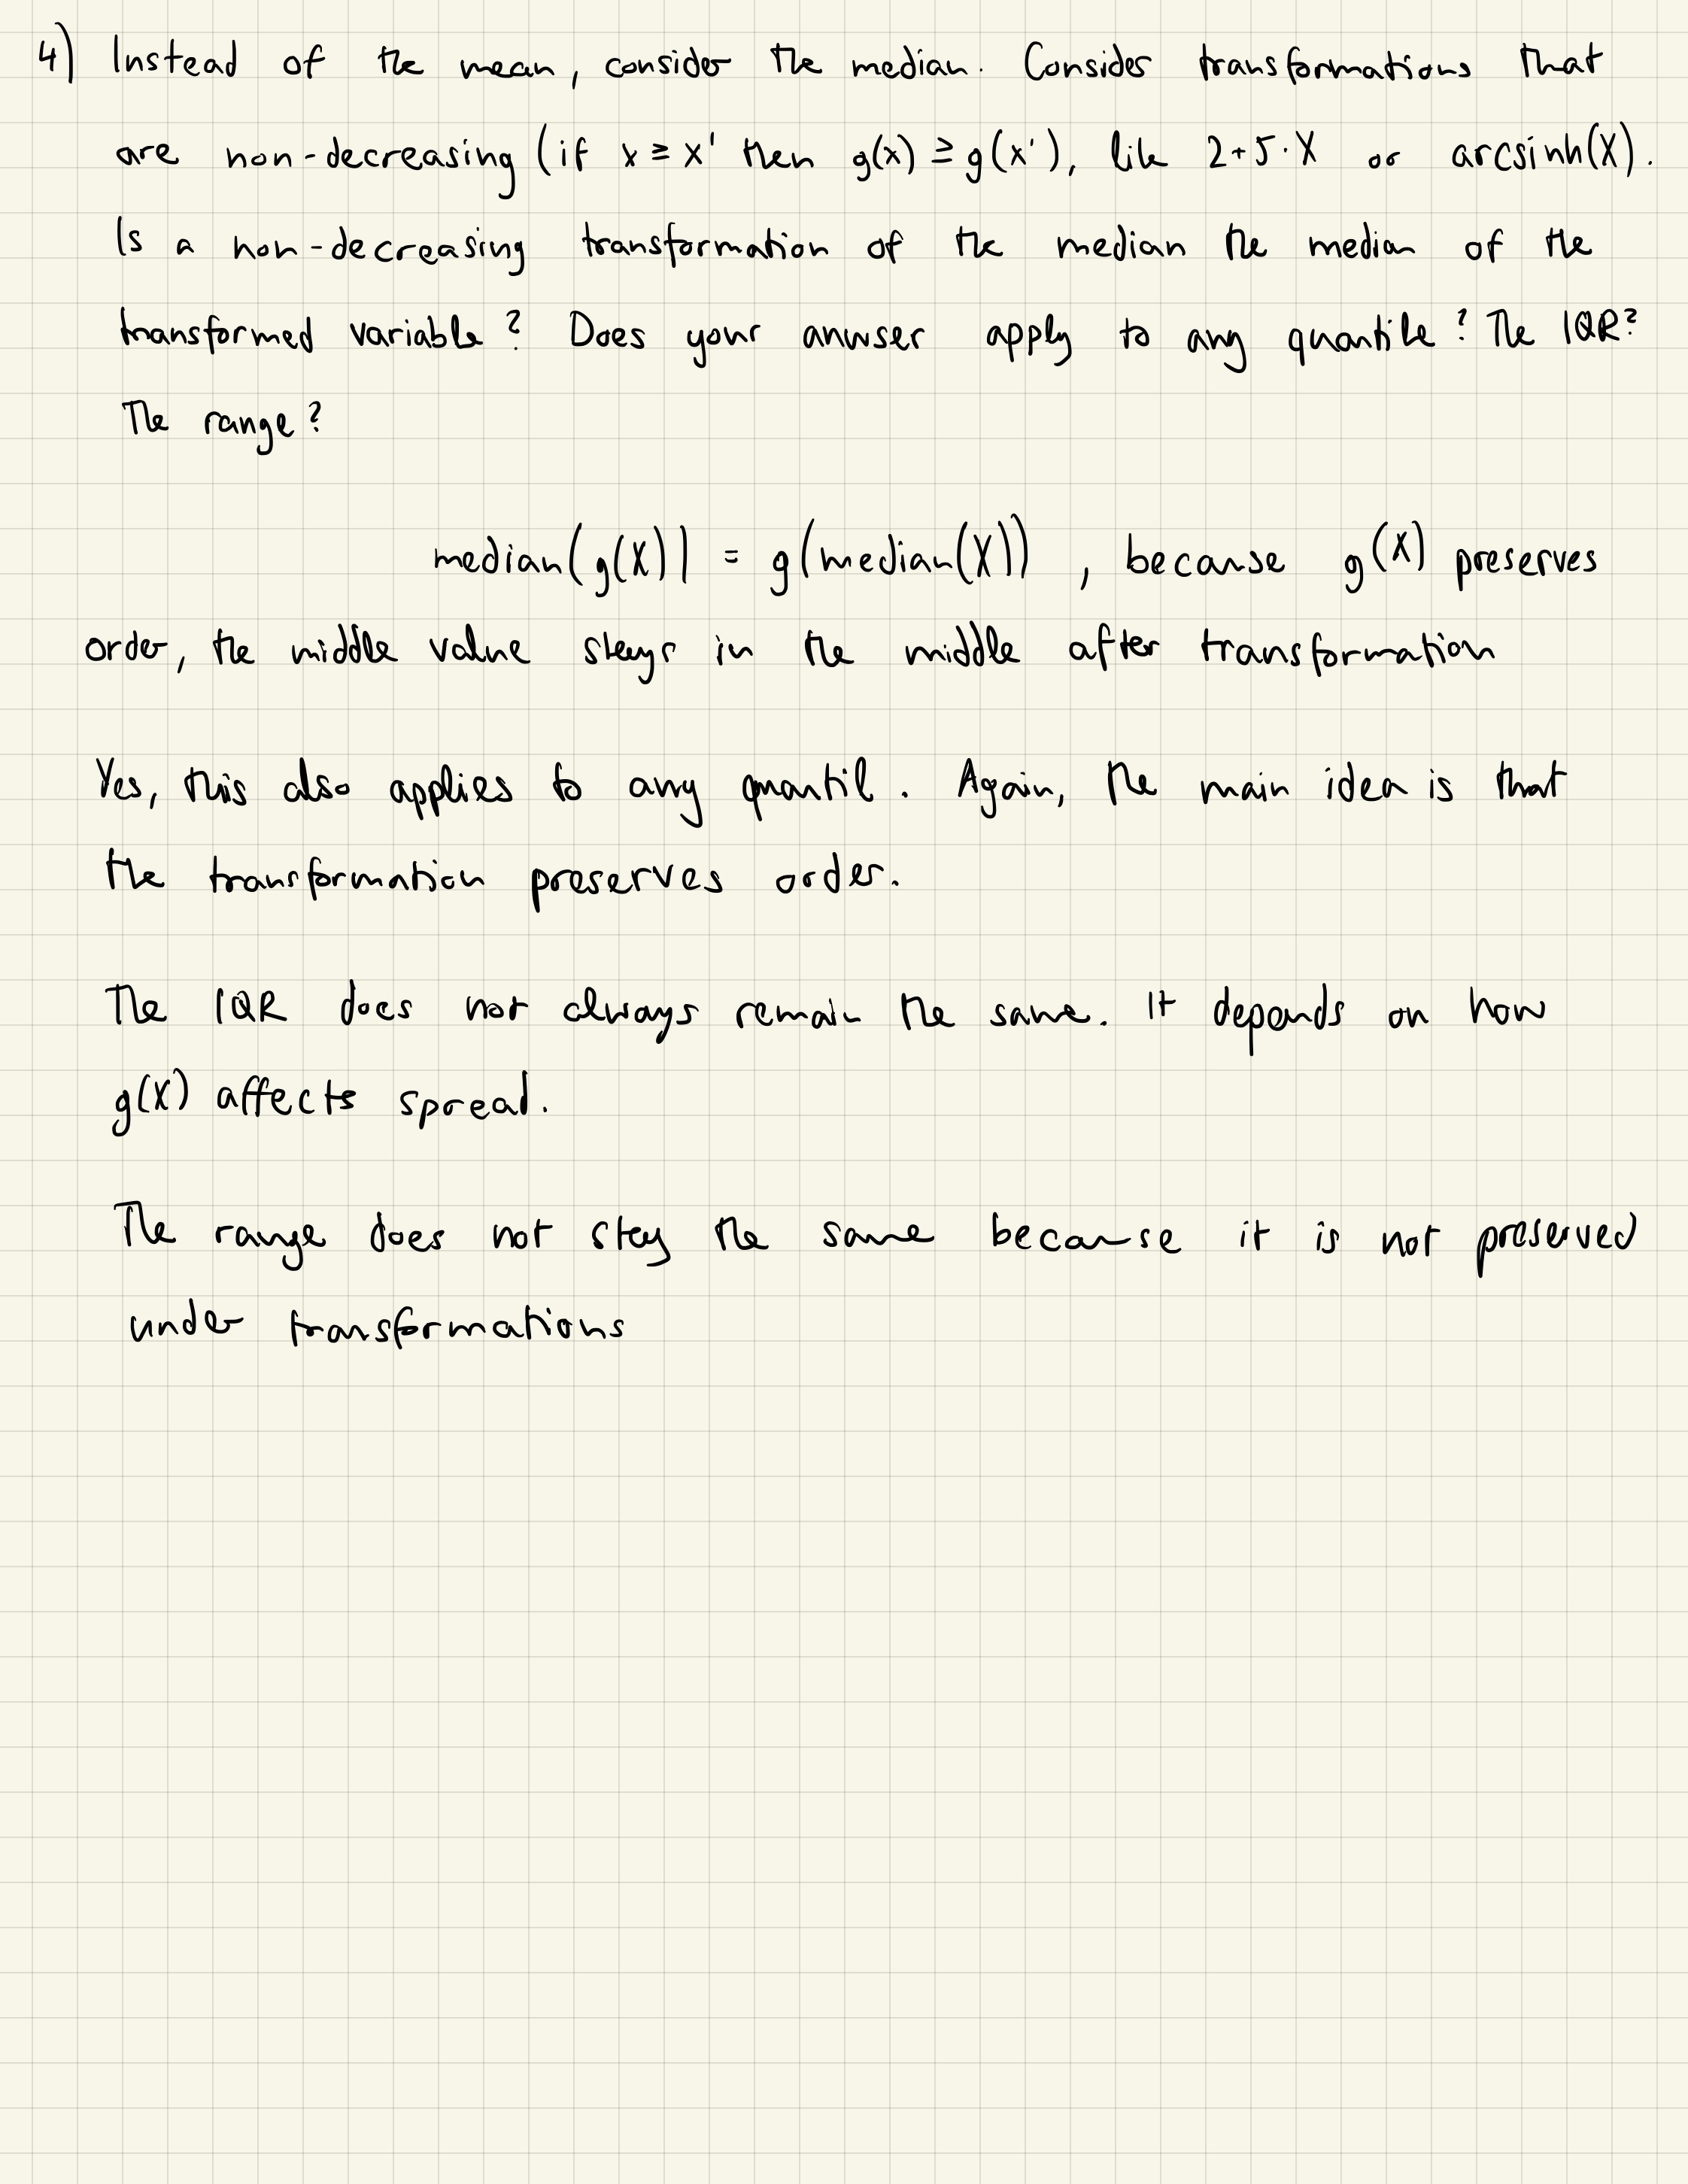

In [6]:
from PIL import Image
im3 = Image.open('/content/sample_data/Unbenanntes Notizbuch-3.jpg')
im3.show()
display(im3)

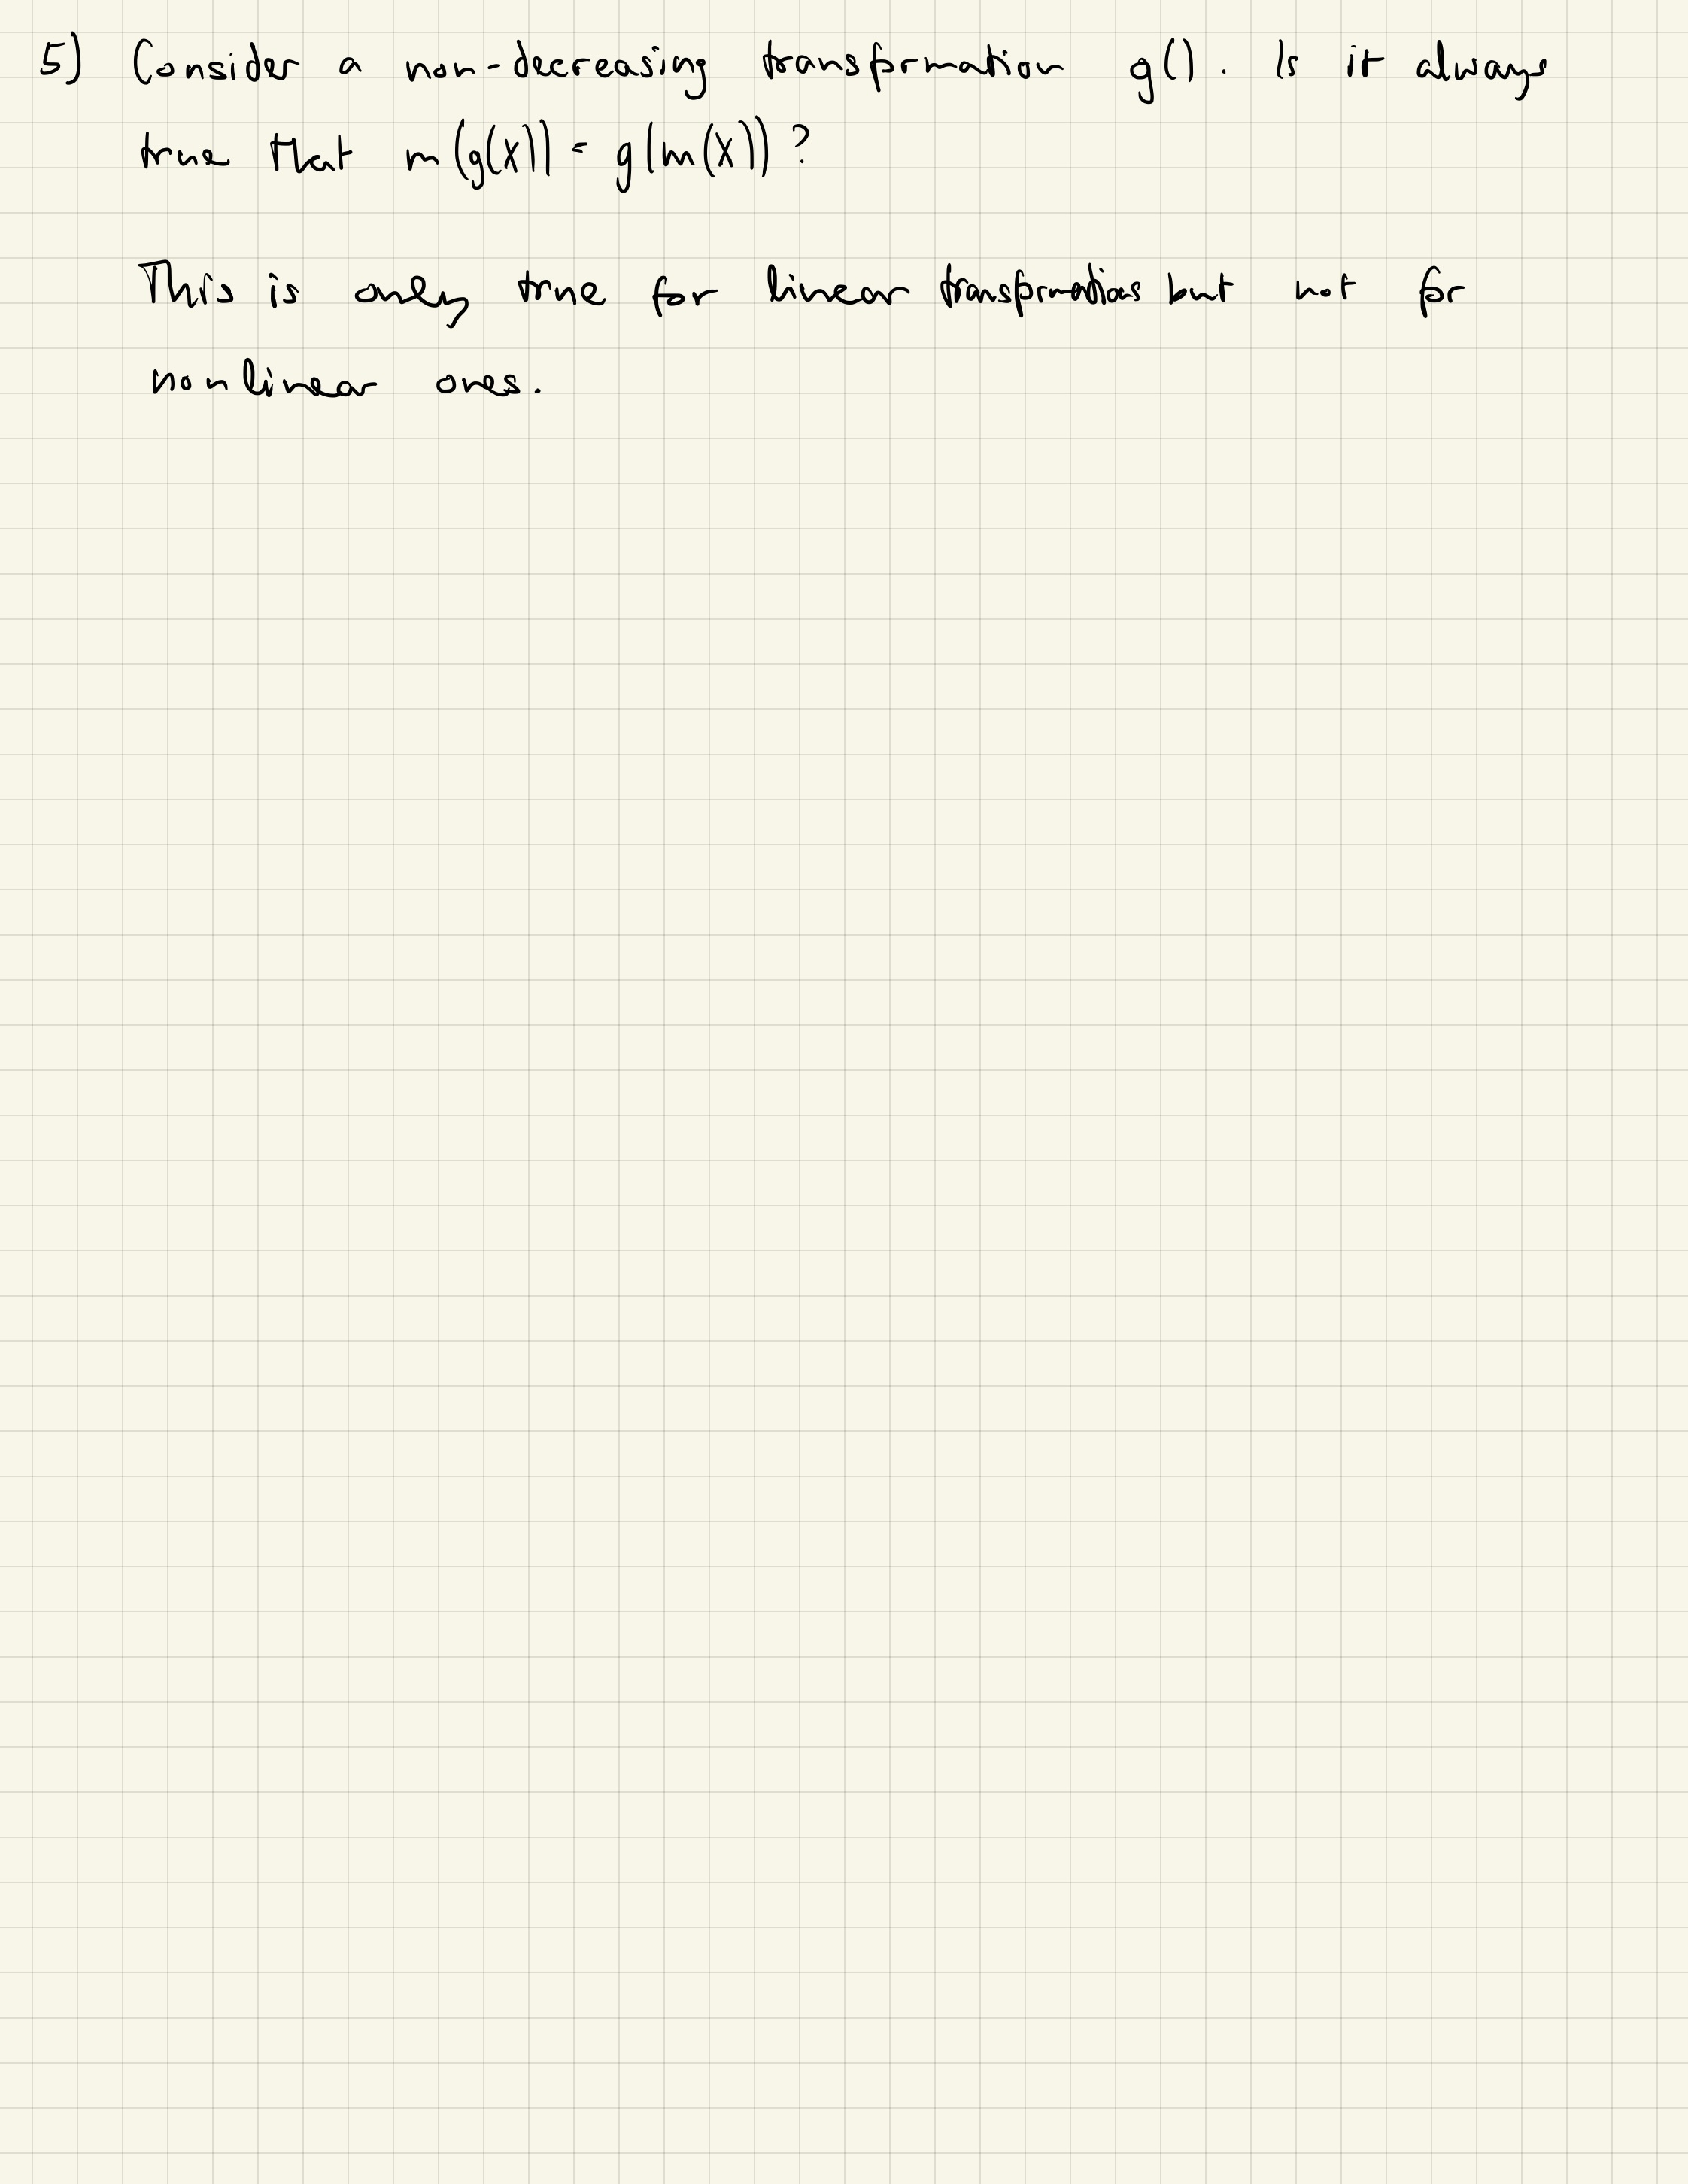

In [7]:
from PIL import Image
im4 = Image.open('/content/sample_data/Unbenanntes Notizbuch-4.jpg')
im4.show()
display(im4)

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
7. Which giftors provide the most money, in total?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates

df_financial = pd.read_csv('/content/ForeignGifts_edu.csv')
df_financial.head()

ID   OPEID               Institution Name          City State  \
0   1  102000  Jacksonville State University  Jacksonville    AL   
1   2  104700                Troy University          Troy    AL   
2   3  105100          University of Alabama    Tuscaloosa    AL   
3   4  105100          University of Alabama    Tuscaloosa    AL   
4   5  105100          University of Alabama    Tuscaloosa    AL   

   Foreign Gift Received Date  Foreign Gift Amount      Gift Type  \
0                       43738               250000  Monetary Gift   
1                       43592               463657       Contract   
2                       43466              3649107       Contract   
3                       43472                 1000       Contract   
4                       43479                49476       Contract   

  Country of Giftor                          Giftor Name  
0             CHINA                                  NaN  
1             CHINA     Confucius Institute Headquarters  
2           ENGLAND  Springer Nature Customer Service Ce  
3      SAUDI ARABIA       Saudi Arabia Education Mission  
4      SAUDI ARABIA       Saudi Arabia Education Mission

<Axes: xlabel='Institution Name', ylabel='Foreign Gift Amount'>

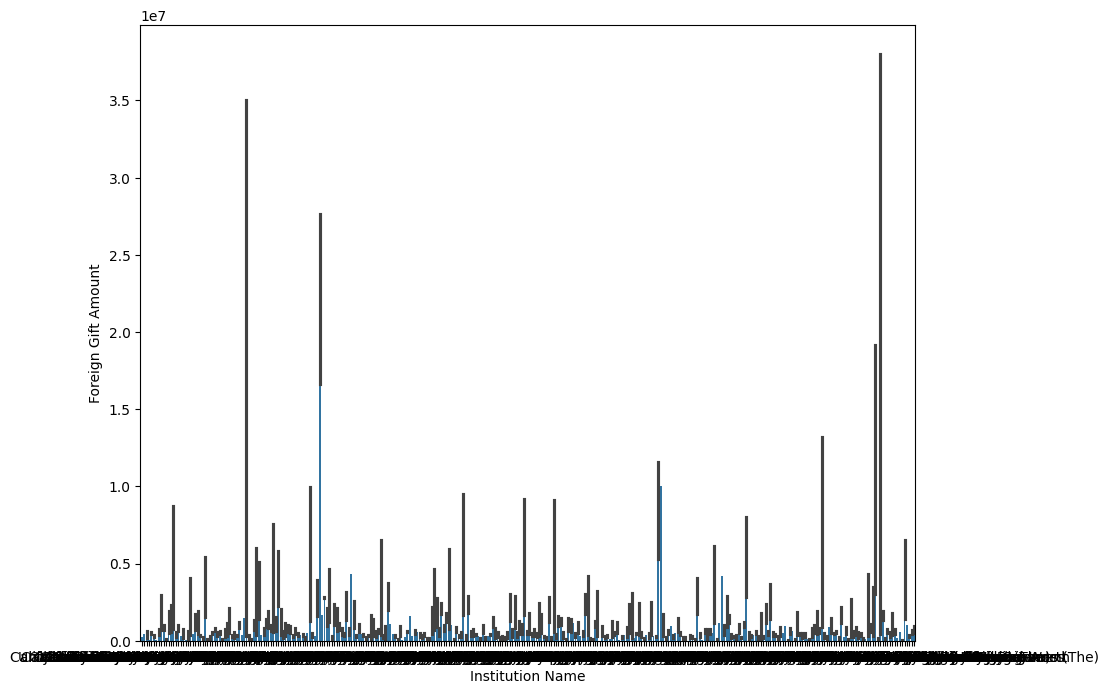

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x=df_financial['Institution Name'], y=df_financial['Foreign Gift Amount'])
#print(df_financial['Institution Name'].unique())

It looks like that most of the Foreign gift amounts are below 10 milion excpet some outliers. I'm not sure whether a histogram plot makes sense here because we have so many different Institutions that we can't read there names along the x-axis, and we have some outliers which forces "messes" up the scaling, we can't tell the difference between the small foreign gift amounts anymore.

In [ ]:
value_counts_df = df_financial['Gift Type'].value_counts(normalize=True).reset_index()
value_counts_df.columns = ['Gift Type','Percantage']
value_counts_df['Percantage'] *= 100
print(value_counts_df)

       Gift Type  Percantage
0       Contract   61.209737
1  Monetary Gift   38.751285
2    Real Estate    0.038978


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='log_gift_amount', ylabel='Density'>

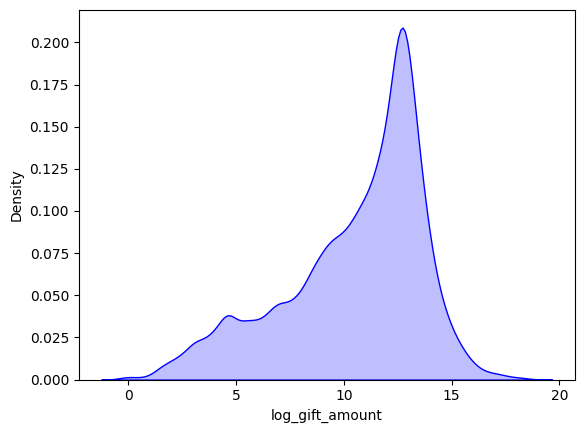

In [ ]:
df_financial['log_gift_amount'] = np.log(df_financial['Foreign Gift Amount'])
sns.kdeplot(df_financial['log_gift_amount'], fill=True,  color='blue')

<Axes: xlabel='log_gift_amount', ylabel='Density'>

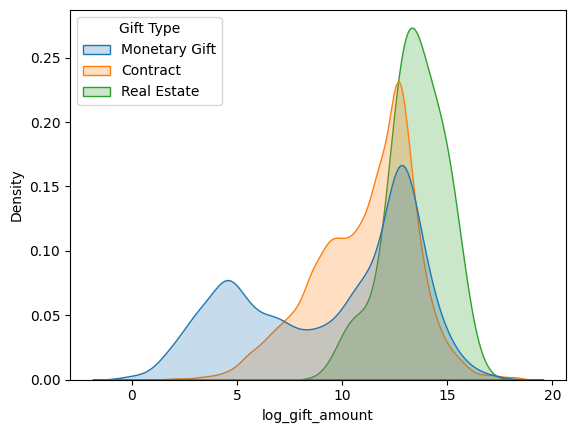

In [ ]:
sns.kdeplot(x=df_financial['log_gift_amount'], hue=df_financial['Gift Type'], fill=True, common_norm=False)

It looks like if you keep following the most outside line in the second plot(starts with blue, then goes to orange and then to green), you would exactly receive the first kde plot.

In [ ]:
top_by_gift = df_financial['Country of Giftor'].value_counts().head(15).reset_index()
top_by_gift.columns = ['Country of Giftor','Number of Gifts']
print(top_by_gift)

   Country of Giftor  Number of Gifts
0            ENGLAND             3655
1              CHINA             2461
2             CANADA             2344
3              JAPAN             1896
4        SWITZERLAND             1676
5       SAUDI ARABIA             1610
6             FRANCE             1437
7            GERMANY             1394
8          HONG KONG             1080
9        SOUTH KOREA              811
10             QATAR              693
11   THE NETHERLANDS              512
12             KOREA              452
13             INDIA              434
14            TAIWAN              381


In [ ]:
top_by_gift_amount = df_financial.groupby('Country of Giftor')['Foreign Gift Amount'].sum().nlargest(15).reset_index()
top_by_gift_amount.columns = ['Country of Giftor','Gift Amount']
print(top_by_gift_amount)

        Countr of Giftor  Gift Amount
0                  QATAR   2706240869
1                ENGLAND   1464906771
2                  CHINA   1237952112
3           SAUDI ARABIA   1065205930
4                BERMUDA    899593972
5                 CANADA    898160656
6              HONG KONG    887402529
7                  JAPAN    655954776
8            SWITZERLAND    619899445
9                  INDIA    539556490
10               GERMANY    442475605
11  UNITED ARAB EMIRATES    431396357
12                FRANCE    405839396
13             SINGAPORE    401157692
14             AUSTRALIA    248409202


In [ ]:
top_received_inst = df_financial.groupby('Institution Name')['Foreign Gift Amount'].sum().nlargest(15).reset_index()
top_received_inst.columns = ['Institution Name', 'Gift Amount Received']
print(top_received_inst)

                                 Institution Name  Gift Amount Received
0                      Carnegie Mellon University            1477922504
1                              Cornell University            1289937761
2                              Harvard University             954803610
3           Massachusetts Institute of Technology             859071692
4                                 Yale University             613441311
5                            Texas A&M University             521455050
6                        Johns Hopkins University             502409595
7                         Northwestern University             402316221
8                           Georgetown University             379950511
9                     University of Chicago (The)             364544338
10                 University of Colorado Boulder             360173159
11                                Duke University             343699498
12                       Brigham Young University             32

<Axes: xlabel='Foreign Gift Amount', ylabel='Count'>

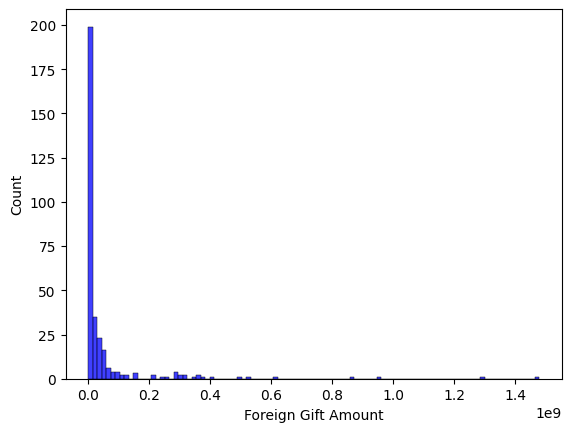

In [ ]:
total_sum = df_financial.groupby('Institution Name')['Foreign Gift Amount'].sum()
sns.histplot(total_sum, bins=100, kde=False, color='blue')

In [ ]:
top_giftor = df_financial.groupby('Giftor Name')['Foreign Gift Amount'].sum().nlargest(5).reset_index()
top_giftor.columns = ['Giftor','Gifted Amount']
print(top_giftor)

                                Giftor  Gifted Amount
0                     Qatar Foundation     1166503744
1  Qatar Foundation/Qatar National Res      796197000
2       Qatar Foundation for Education      373945215
3                            Anonymous      338793629
4       Saudi Arabian Cultural Mission      275221475


**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates

df_drilling = pd.read_csv('/content/drilling_rigs.csv')
df_drilling.head()


Month  \
0   1973 January   
1  1973 February   
2     1973 March   
3     1973 April   
4       1973 May   

   Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)  \
0                                               1120                              
1                                               1037                              
2                                                959                              
3                                                914                              
4                                                974                              

   Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)  \
0                                                 99                               
1                                                 89                               
2                                                 90                               
3                                                 79                               
4                                                 72                               

  Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)  \
0                                      Not Available           
1                                      Not Available           
2                                      Not Available           
3                                      Not Available           
4                                      Not Available           

  Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)  \
0                                      Not Available             
1                                      Not Available             
2                                      Not Available             
3                                      Not Available             
4                                      Not Available             

  Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)  \
0                                      Not Available                                           
1                                      Not Available                                           
2                                      Not Available                                           
3                                      Not Available                                           
4                                      Not Available                                           

  Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)  \
0                                      Not Available                                            
1                                      Not Available                                            
2                                      Not Available                                            
3                                      Not Available                                            
4                                      Not Available                                            

  Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)  \
0                                      Not Available                                         
1                                      Not Available                                         
2                                      Not Available                                         
3                                      Not Available                                         
4                                      Not Available                                         

   Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)  \
0                                               1219                            
1                                               1126                            
2                                               1049                            
3                                                993   

In [ ]:
print(df_drilling.shape)

(623, 10)


We have 623 obeservations and 10 different variables

In [ ]:
print(df_drilling.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column                                                                                       Non-Null Count  Dtype 
---  ------                                                                                       --------------  ----- 
 0   Month                                                                                        623 non-null    object
 1   Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)                 623 non-null    int64 
 2   Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)                623 non-null    int64 
 3   Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)                                   623 non-null    object
 4   Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                                 623 non-null    object
 5   Crude Oil and Natural Gas Rotary Rigs in Op

It looks like we have a lot of variables which are of type object instead of an float64. Let's change that.

In [ ]:
obj_to_numeric = ['Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)',
                  'Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)',
                  'Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)',
                  'Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)',
                  'Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)',
                  'Active Well Service Rig Count (Number of Rigs)']

df_drilling[obj_to_numeric] = df_drilling[obj_to_numeric].apply(pd.to_numeric, errors='coerce')
print(df_drilling.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   Month                                                                                        623 non-null    object 
 1   Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)                 623 non-null    int64  
 2   Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)                623 non-null    int64  
 3   Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)                                   448 non-null    float64
 4   Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                                 448 non-null    float64
 5   Crude Oil and Natural Gas Rotary Rig

We changed the objects to floats (except for the variable months) and we chnaged all the missing values to NaN.

In [ ]:
df_drilling['time'] = pd.to_datetime(df_drilling['Month'], format='mixed')

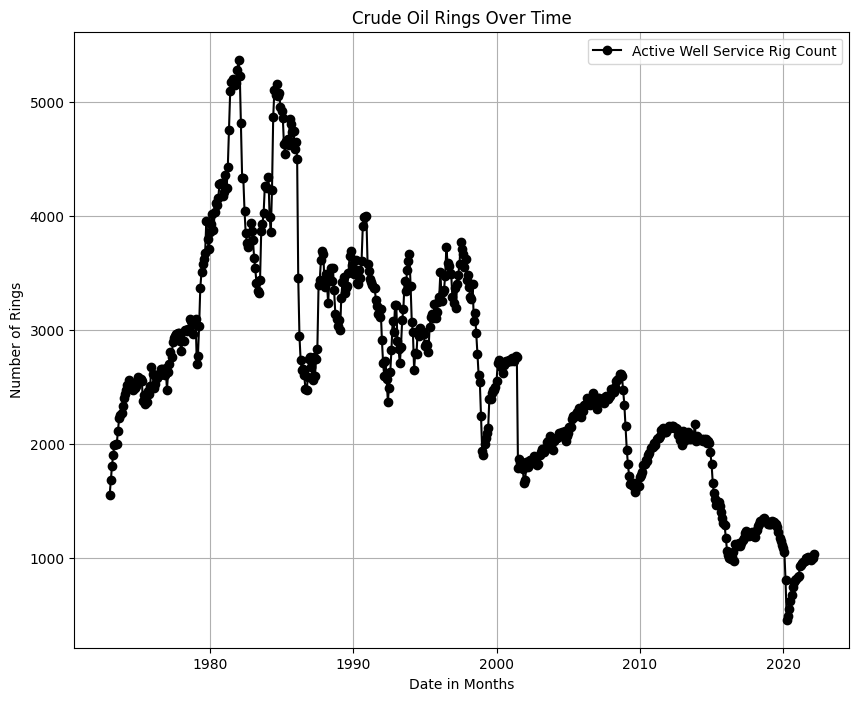

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(df_drilling['time'],df_drilling['Active Well Service Rig Count (Number of Rigs)'],marker='o',linestyle='-',color='black',label='Active Well Service Rig Count')

plt.xlabel('Date in Months')
plt.ylabel('Number of Rings')
plt.title('Crude Oil Rings Over Time')
plt.legend()
plt.grid(True)

There was a really strong increase in the number of oil rings from the start(1975) till 1985 and then it started decreassing.

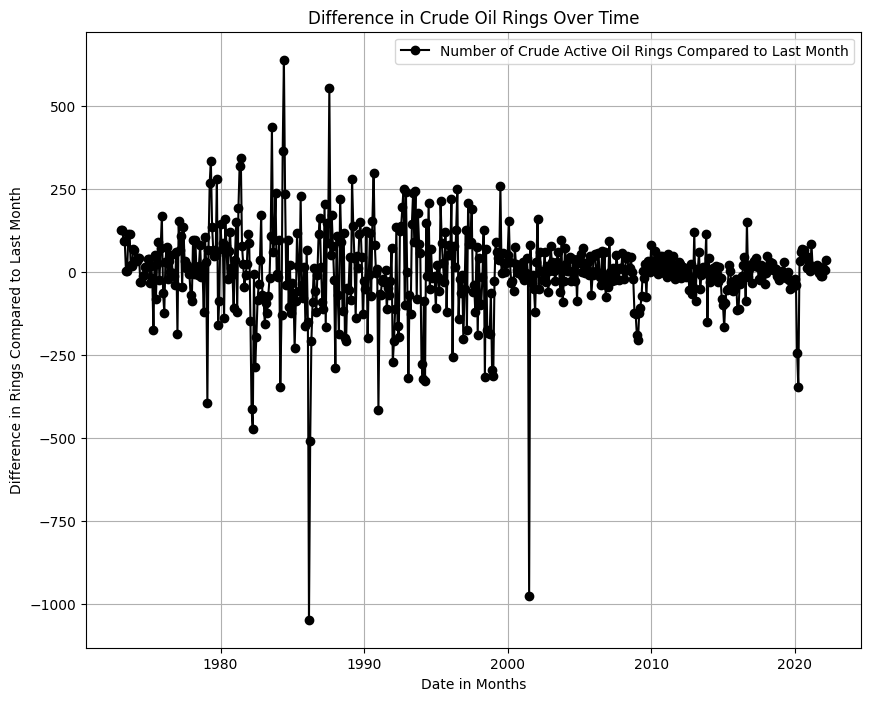

In [ ]:
difference_oilrings = df_drilling.resample('ME', on='time')["Active Well Service Rig Count (Number of Rigs)"].last().diff()

plt.figure(figsize=(10,8))
plt.plot(df_drilling['time'],difference_oilrings,marker='o',linestyle='-',color='black',label='Number of Crude Active Oil Rings Compared to Last Month')

plt.xlabel('Date in Months')
plt.ylabel('Difference in Rings Compared to Last Month')
plt.title('Difference in Crude Oil Rings Over Time')
plt.legend()
plt.grid(True)

We can see here that the difference in Crude Oil rings compared to last months is more or less steady and only has four "outlier" months(around 1985,1986,1987 and 2002).

In [ ]:
onshore = 'Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)'
offshore = 'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'

df_melted = df_drilling.melt(id_vars=['time'],value_vars=[onshore,offshore],
                             var_name='Rig Types', value_name='Number of Rigs')

df_melted.dropna(inplace=True)

df_melted.head()

time                                          Rig Types  \
0 1973-01-01  Crude Oil and Natural Gas Rotary Rigs in Opera...   
1 1973-02-01  Crude Oil and Natural Gas Rotary Rigs in Opera...   
2 1973-03-01  Crude Oil and Natural Gas Rotary Rigs in Opera...   
3 1973-04-01  Crude Oil and Natural Gas Rotary Rigs in Opera...   
4 1973-05-01  Crude Oil and Natural Gas Rotary Rigs in Opera...   

   Number of Rigs  
0            1120  
1            1037  
2             959  
3             914  
4             974

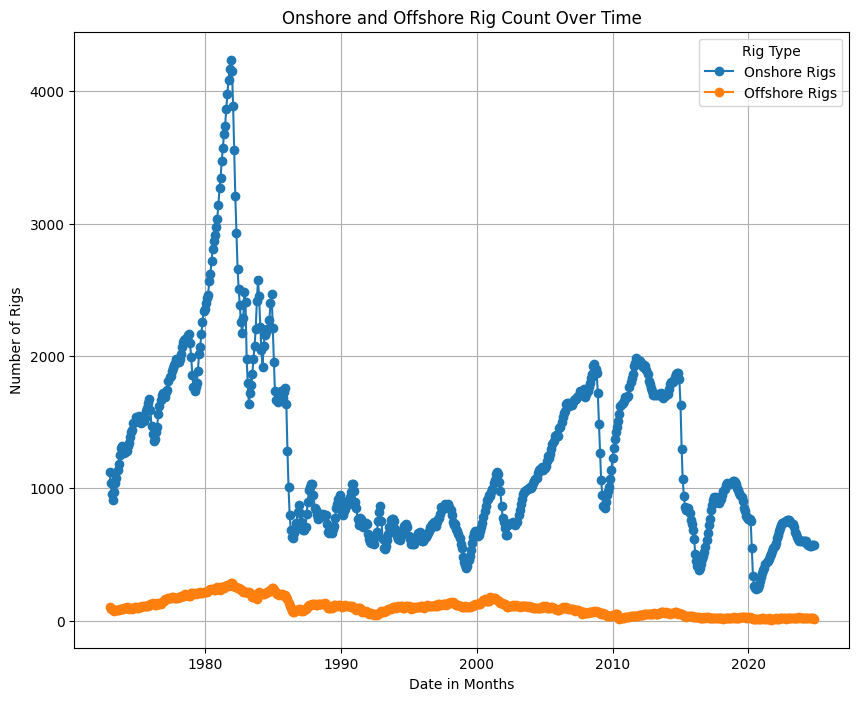

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(df_drilling['time'], df_drilling[onshore], marker="o", linestyle="-", label="Onshore Rigs")
plt.plot(df_drilling['time'], df_drilling[offshore], marker="o", linestyle="-", label="Offshore Rigs")

plt.xlabel("Date in Months")
plt.ylabel("Number of Rigs")
plt.title("Onshore and Offshore Rig Count Over Time")
plt.legend(title="Rig Type")
plt.grid(True)